# HW8

Say you are given a data set where each observed example has a set of features, but **has no labels**. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call **clusters**. In clustering we input the feature matrix, $X$. 

The $i$th row of the $X$ matrix records the measurement of p features of $i$th object. 

**K-Means** is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

# Question 1 (Theoretical Question)

The basic idea behind k-means clustering is constructing clusters so that the **Total Within-Cluster Variation** given by 

$$\frac{1}{|C_k|}\sum_{i,j \in C_k}d_{ij} =  \frac{1}{|C_k|}\sum_{i,j \in C_k}\sum_{t = 1}^P (x_{it} - x_{jt})^2 $$ is minimized. 

where $C_k$ is the $k$th cluster. 

Then prove the following identity: 
$$\frac{1}{|C_k|}\sum_{i,j \in C_k}\sum_{t = 1}^P (x_{it} - x_{jt})^2 =  2\sum_{i\in C_k}\sum_{t = 1}^P (x_{it} - \overline{x}_{kt})^2 $$ 

where, $\frac{1}{|C_k|}\sum_{i\in C_k}x_{it} = \overline{x}_{kt}$ is the mean of the feature $t$ of Cluster $C_k$.

The above identity shows that minimizing the distance between every pair of objects within cluster is equivalent to minimizing the distance between every objects in the cluster to it's cluster mean **(centroid)**. 


 - 

# Question 2 (Theoretical Question)

In this problem, you will perform K-means clustering manually, with K = 2 (that means 2 clusters), on a small example with n = 6 observations and p = 2 features. The observations are as follows.

| Obs. | $X_1$ | $X_2$ | 
|------|-------|-------|
| 1    | 1     | 4     |
| 2    | 1     | 3     |
| 3    | 0     | 4     |
| 4    | 5     | 1     | 
| 5    | 6     | 2     |
| 6    | 4     | 0     | 

1. Plot the observations using plt.scatter() function. 
2. Without using python coding, find the co-ordinates of the cluster centroids. Report the cluster labels for each observation.

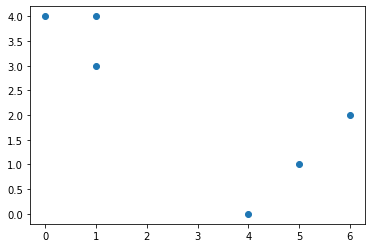

In [4]:
x2 = [4,3,4,1,2,0]
x1 = [1,1,0,5,6,4]
plt.scatter(x1,x2)#i use this to visualize hpow many cluster i think there shoud be , there seems to be 2

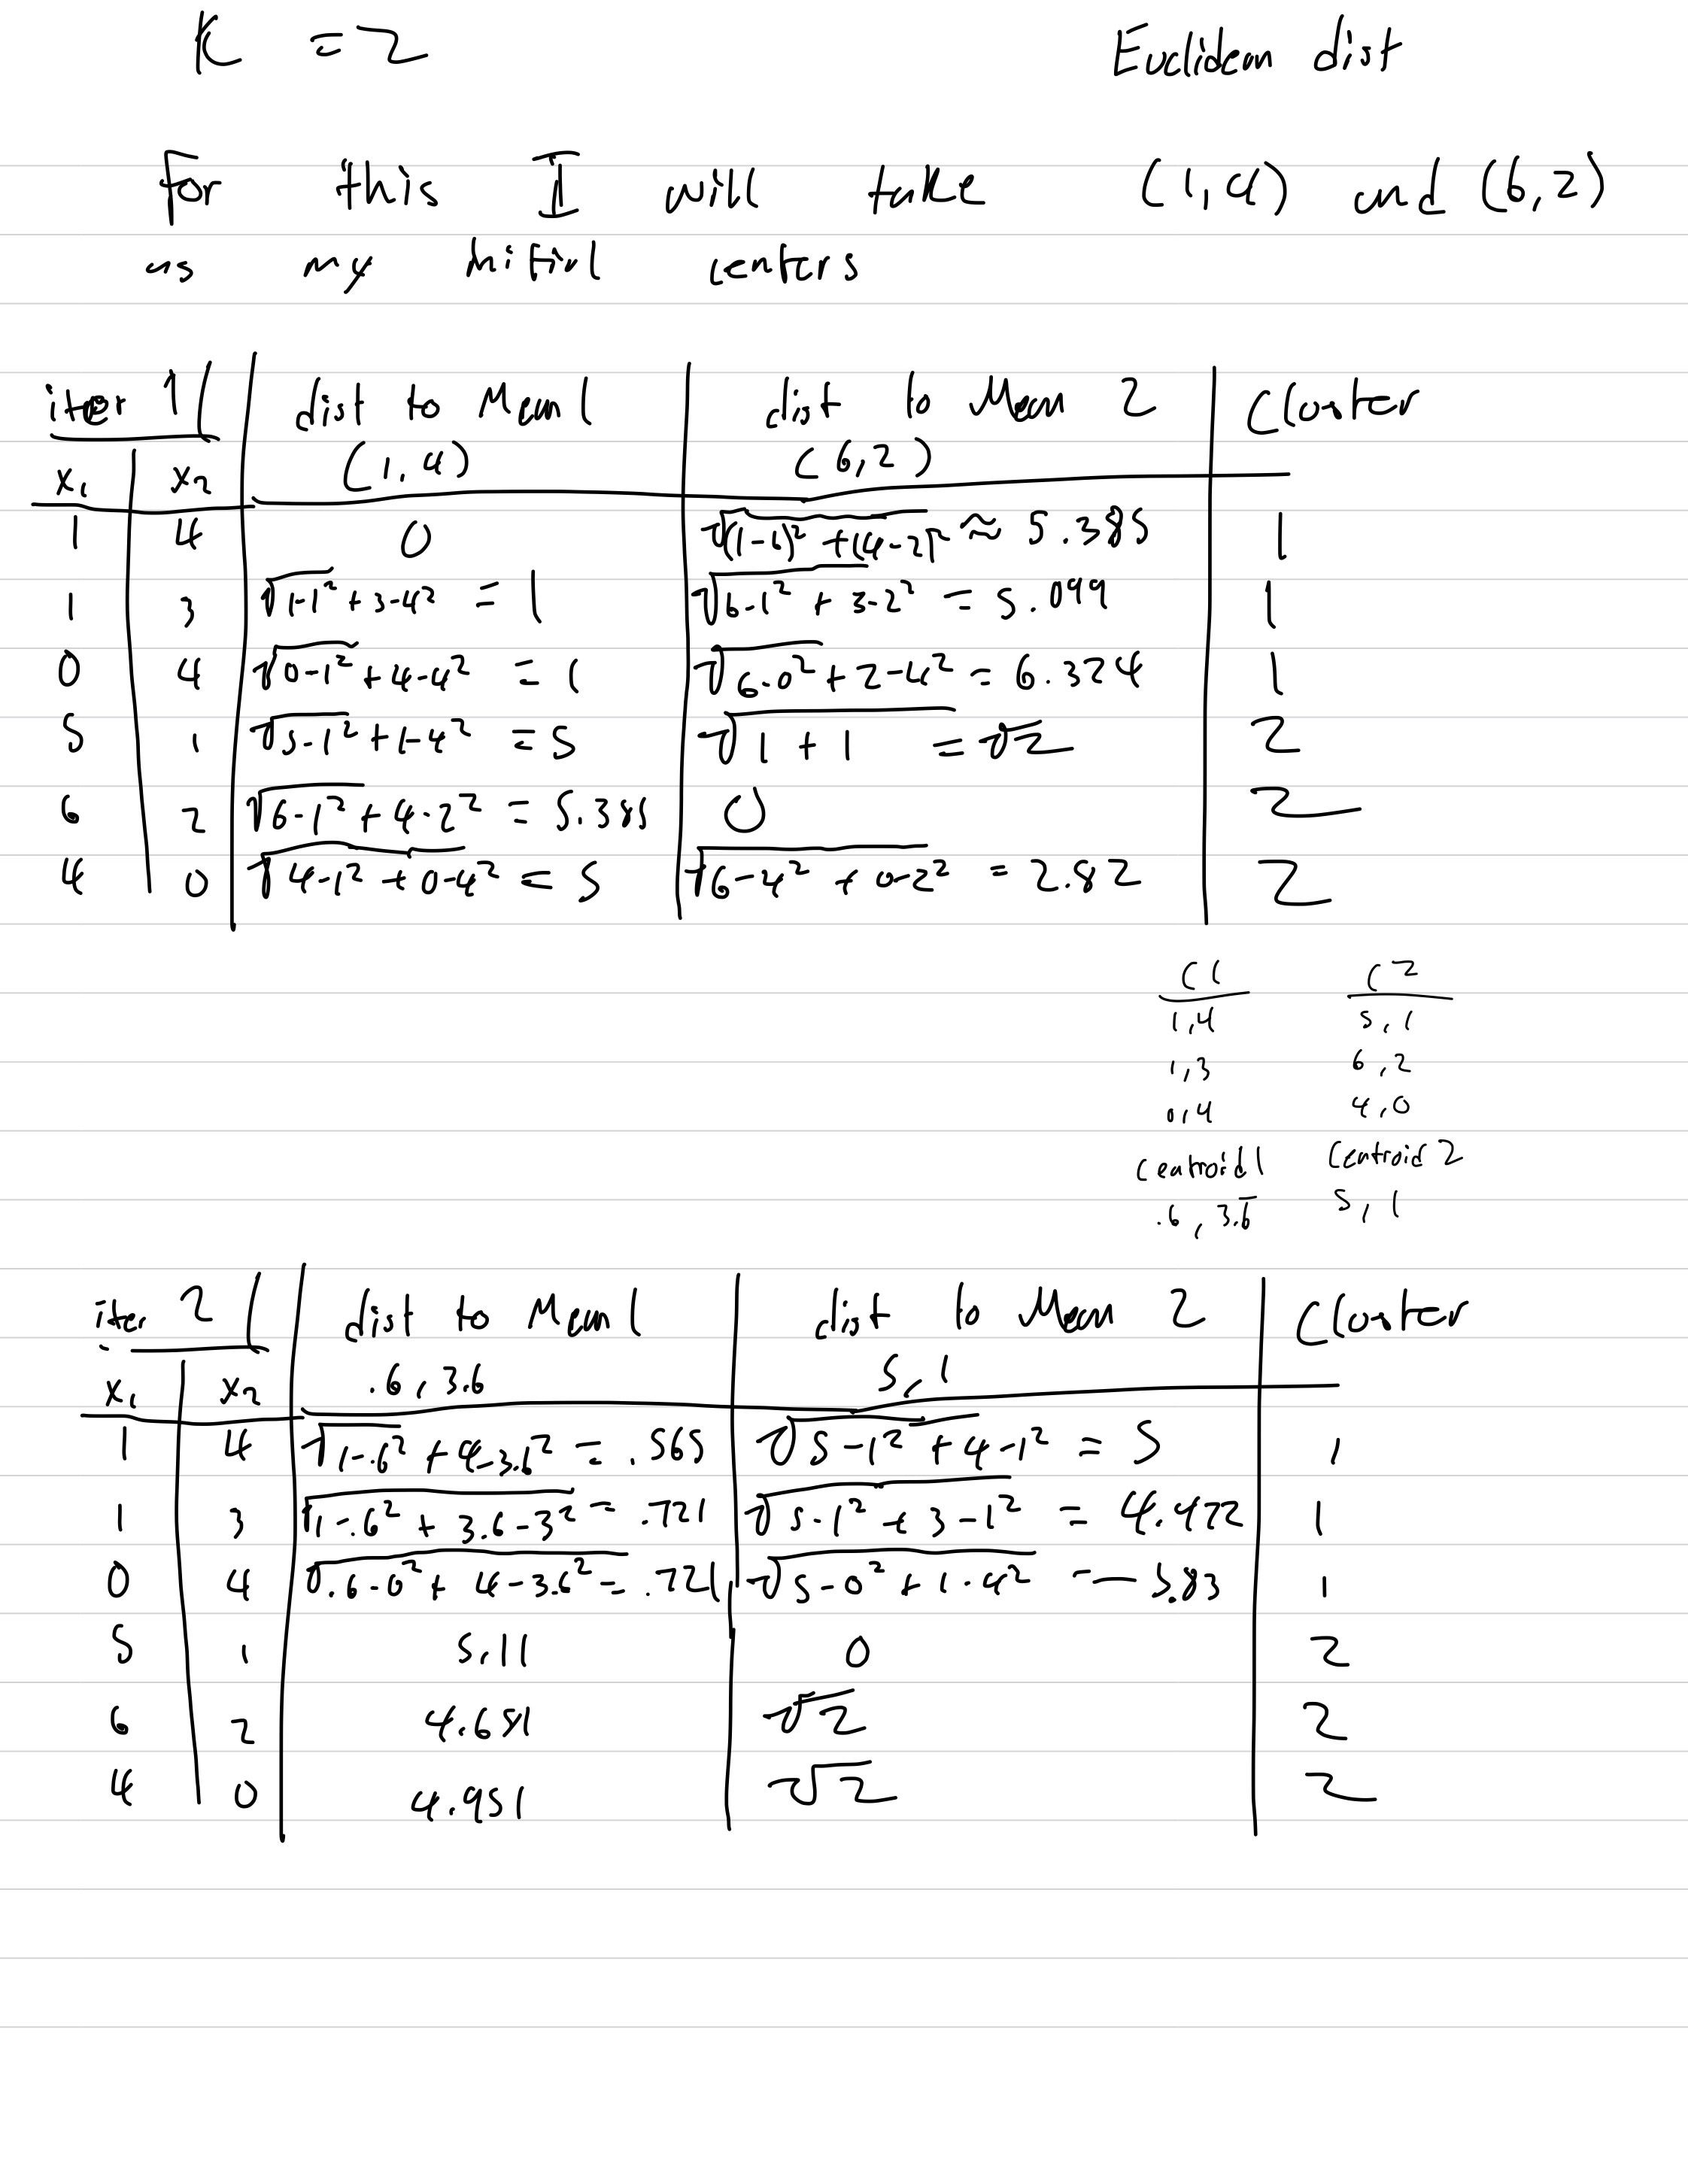

from here we can see that even after the 2nd iteration we have reached the same results , if we plot the centroids we have our plot looks like this:


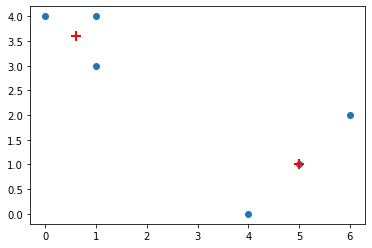

In [5]:
plt.scatter(x1,x2)
plt.scatter(.6,3.6, marker='+', s=100, c='red', linewidth=2)
plt.scatter(5,1, marker='+', s=100, c='red', linewidth=2)




In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Question 3. 

Take a jpeg picture of yours. Apply Kmeans with K = 2 and K = 5 for Image Segmentation and compare with the original image. 

In [37]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

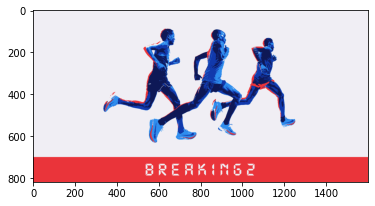

In [38]:
i1 = imread('/Users/arturovillalobos/STAT_files/HOMEWORK/hw8/breaking_2.jpg')
i1 = i1/255.0
image = i1.reshape(-1,3)
kmeans = KMeans(n_clusters=5)
kmeans.fit(image)
seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(i1.shape)
plt.imshow(seg_img)

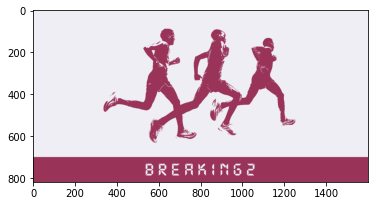

In [39]:
image = i1.reshape(-1,3)
kmeans = KMeans(n_clusters=2)
kmeans.fit(image)
seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(i1.shape)
plt.imshow(seg_img)

# Question 4 

A researcher collects expression measurements for $1000$ genes in 40 tissue samples of 40 different patients. The data can be written as a $1000 \times 40$ matrix, which we call $X$, in which each row represents a gene and each column a tissue sample.

Load the `Gene_expression.csv` data set used in the previous homework and use .T method to transpose the matrix such that it becomes a $40 \times 1000$ matrix. The first 20 samples are from healthy patients, while the second 20 are from a diseased group. 

use `.shape` method to report the dimension of the matrix

In [49]:
X = pd.read_csv('Gene-expression.csv').T
X = X.to_numpy()
X.shape

(40, 999)

1. Defines a new variable, `cancer_status` such that it is = 0 for healthy patients and is = 1 for cancer patients

In [56]:
healthy = 0*np.ones(20)
disease = 1*np.ones(20)
cancer_status = np.concatenate([healthy, disease])
cancer_status

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

2. Apply Kmeans only to the gene expression data with K = 2 to the samples. **Do the genes separate the samples into the two groups** ? Hint: Use confusion_matrix from sklearn.metrics and compare the kmeans.labels_ with the 

In [55]:
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=2).fit(X)
kmeans.labels_
confusion_matrix(kmeans.labels_, cancer_status)

array([[ 0, 20],
       [20,  0]])

3. High dimensional Data Visualization:  the clustering in the following heat map. Do you see the difference in Genes between healthy and cancer patients ?

- yes, every person considered to have cancer have very promonent gene differences in the midportion of the visualization , (genes 576-490)

In [61]:
kmeans.labels_



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(33.0, 0.5, 'Genes')

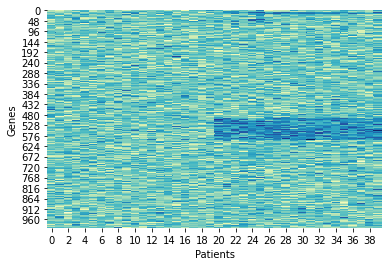

In [62]:
import seaborn as sns
ax = sns.heatmap(X.transpose(), cmap="YlGnBu", cbar=False)
ax.set_xlabel('Patients')
ax.set_ylabel('Genes')

4. Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here. These genes are also known as Biomarker Genes? 

# Question 5 (Simulation)

In this problem, you will generate simulated data using `make_classification` function, and then perform K-means and Gaussian Mixture Model clustering on the data. 


1. Run the following code to generate a simulated data set with 100 observations in each of two classes (i.e. 200 observations total), and 5 features and plot the data with true labels.

In [65]:
from sklearn.datasets import make_classification

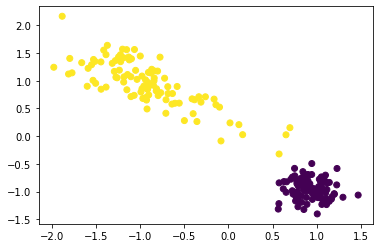

In [83]:
Data, labels_true = make_classification(n_samples=200, n_features=5, n_informative=3, n_classes=2,
                                     n_redundant=1, class_sep= 2, n_clusters_per_class=1, random_state=1, scale = 1)
clusters = np.unique(labels_true)

# normalize dataset for easier parameter selection
Data = StandardScaler().fit_transform(Data)
plt.scatter(Data[:, 0], Data[:, 1], c = labels_true)
plt.show()

2. Run Kmeans and plot the clustering result. 

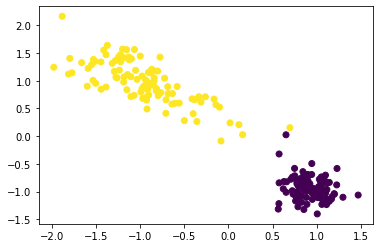

In [86]:
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=2).fit(Data)
#kmeans.labels_
plt.scatter(Data[:, 0], Data[:, 1],c = kmeans.labels_ )

plt.show()

3. Run GMM and plot the clustering result. 

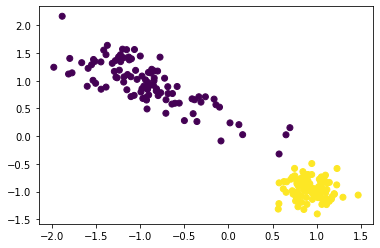

In [84]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=2, random_state=42).fit(Data).predict(Data)

plt.scatter(Data[:, 0], Data[:, 1],c = y_pred )



plt.show()

4. Which clustering algorithm is more accurate ? Explain why that clustering algorithm performed better ?

with the first plot as a refrence , we can see that GMM does a better job at classification that kmeans. this is because there is a large amount of varience with the cluster in the top left . 

# Question 6

Plot the following non convex data sets using the following code. Apply both Kmeans and GMM with 2 clusters and plot the labels and the **cluster centroids**. 

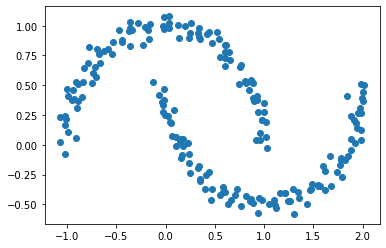

In [87]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

# Kmeans

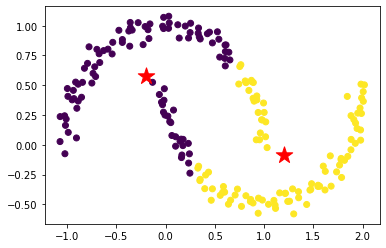

In [93]:
kmeans = KMeans(n_clusters=2).fit(Xmoon)
#kmeans.labels_
plt.scatter(Xmoon[:, 0], Xmoon[:, 1],c = kmeans.labels_ )
centroids = kmeans.cluster_centers_


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='centroid')


plt.show()

# GMM

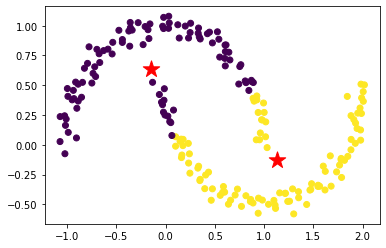

In [95]:
l1 = GaussianMixture(n_components=2, random_state=12).fit(Xmoon)
y_pred = l1.predict(Xmoon)

plt.scatter(Xmoon[:, 0], Xmoon[:, 1],c = y_pred )

centroids = l1.means_


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='centroid')

plt.show()